# EDA - Bivariate Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import httpimport

from pathlib import Path
from scipy.stats import chi2_contingency, pointbiserialr
import statsmodels.api as sm

In [2]:
# Import personal library
with httpimport.github_repo("junclemente", "jcds", ref="master"):
    import jcds.eda as jq

In [3]:
datasets = Path("../datasets")
full_df = pd.read_csv(datasets / "school_clean.csv")
full_df.head()

,Student_ID,Undergrad_Degree,Undergrad_Grade,MBA_Grade,Work_Experience,Employability_Before,Employability_After,Status,Annual_Salary
0,1,Business,68.4,90.2,No,252.0,276.0,Placed,111000.0
1,2,Business,62.1,92.8,No,423.0,410.0,Not Placed,0.0
2,3,Computer Science,70.2,68.7,Yes,101.0,119.0,Placed,107000.0
3,4,Engineering,75.1,80.7,No,288.0,334.0,Not Placed,0.0
4,5,Finance,60.9,74.9,No,248.0,252.0,Not Placed,0.0


Since the goal is to determine which students have the highest chance of being placed, the project will focus on data that would be available during admissions. 

The columns are ['Undergrad_Degree', 'Undergrad_Grade', 'Work_Experience', 'Employability_Before', 'Status'].

In [4]:
pre_admission_columns = [
    "Undergrad_Degree",
    "Undergrad_Grade",
    "Work_Experience",
    "Employability_Before",
    "Status",
]
df = full_df[pre_admission_columns]
df.head()

,Undergrad_Degree,Undergrad_Grade,Work_Experience,Employability_Before,Status
0,Business,68.4,No,252.0,Placed
1,Business,62.1,No,423.0,Not Placed
2,Computer Science,70.2,Yes,101.0,Placed
3,Engineering,75.1,No,288.0,Not Placed
4,Finance,60.9,No,248.0,Not Placed


In [16]:
# Create encoded column for status
df.loc[:, "Status_enc"] = df.Status.map({"Placed": 1, "Not Placed": 0})
df.head()

,Undergrad_Degree,Undergrad_Grade,Work_Experience,Employability_Before,Status,Status_enc
0,Business,68.4,No,252.0,Placed,1
1,Business,62.1,No,423.0,Not Placed,0
2,Computer Science,70.2,Yes,101.0,Placed,1
3,Engineering,75.1,No,288.0,Not Placed,0
4,Finance,60.9,No,248.0,Not Placed,0


In [6]:
# Set global color palette
global_color = "colorblind"
# Set global color for Seaborn
sns.set_palette(global_color)
# Set global color palette for Matplotlib
colors = sns.color_palette(global_color)
plt.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)

# Comparison of Undergrad_Grade and Employability_Before to Status

## Box Plot

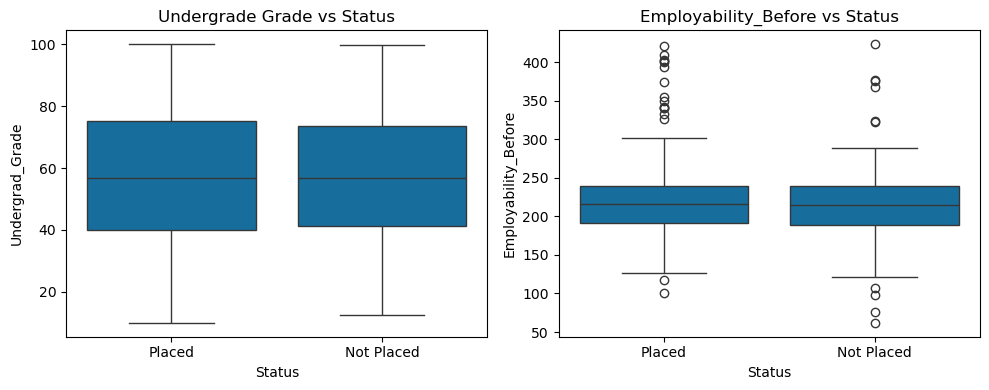

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(x="Status", y="Undergrad_Grade", data=df, ax=ax[0])
ax[0].set_title("Undergrade Grade vs Status")

sns.boxplot(x="Status", y="Employability_Before", data=df, ax=ax[1])
ax[1].set_title("Employability_Before vs Status")

plt.tight_layout()
plt.show()

These boxplots do not show anything significant related to Status. 

In [8]:
# Correlation of undergrad grade
correlation, p_value = pointbiserialr(df["Undergrad_Grade"], df["Status_enc"])
print("Undergrad Grade vs Status:")
print(f"Correlation: {correlation:.5f}")
print(f"P-value: {p_value:.5f}")


correlation, p_value = pointbiserialr(df["Employability_Before"], df["Status_enc"])
print("\nEmployability Before vs Status:")
print(f"Correlation: {correlation:.5f}")
print(f"P-value: {p_value:.5f}")

Undergrad Grade vs Status:
Correlation: -0.00224
P-value: 0.93816

Employability Before vs Status:
Correlation: 0.04211
P-value: 0.14486


Correlation ranges from -1 to 1. A weak correlation is |0.1| to |0.3|. 
Both variables are showing no correlation or a very weak correlation in the range of 0 to |0.1|. 
Depending on the threshold used, a variable can be statistically significant.
The lower the p-value, the more statistically significant it can be. 

- For the undergrad grade, with a high p-value and a very weak correlation, this variable is showing that it has no significance in determining status. 
- For the employability before, it also shows a very weak correlation but the p-value is lower and could have some statistical significance.

## Regression Plots

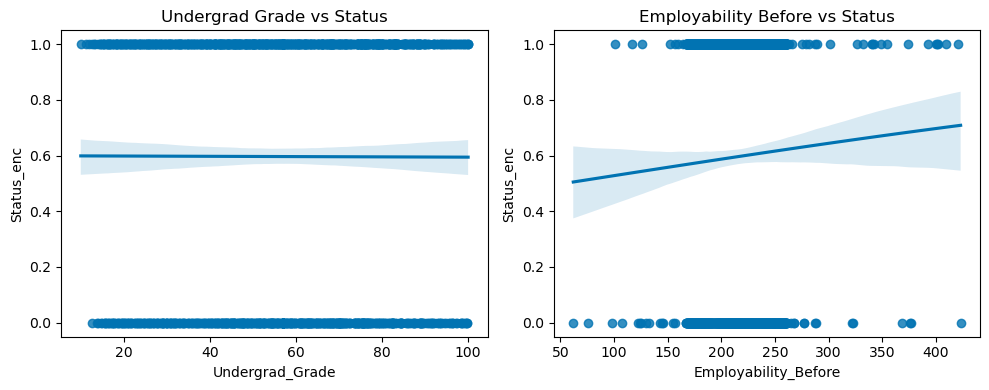

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

sns.regplot(x="Undergrad_Grade", y="Status_enc", data=df, logistic=True, ax=ax[0])
ax[0].set_title("Undergrad Grade vs Status")

sns.regplot(x="Employability_Before", y="Status_enc", data=df, logistic=True, ax=ax[1])
ax[1].set_title("Employability Before vs Status")


plt.tight_layout()
plt.show()

Looking at the regression plot for Undergrad Grade and Status, being a horizontal line, shows that there is no correlation between the two variables. 

For employability before, the upward slope of the regresion line shows that is has a positive correlation with status. 

# Undergrad Degree vs Status

In [10]:
# Create contingency table
undergrad_ct = pd.crosstab(df["Undergrad_Degree"], df["Status"])
print(undergrad_ct)

chi2, p, dof, expected = chi2_contingency(undergrad_ct)
print(f"\nChi-Square value: {chi2}")
print(f"P-value: {p}")

Status            Not Placed  Placed
Undergrad_Degree                    
Art                      224       6
Business                  17     240
Computer Science           9     231
Engineering              230       9
Finance                    4     230

Chi-Square value: 1021.4286957111007
P-value: 8.102228587883412e-220


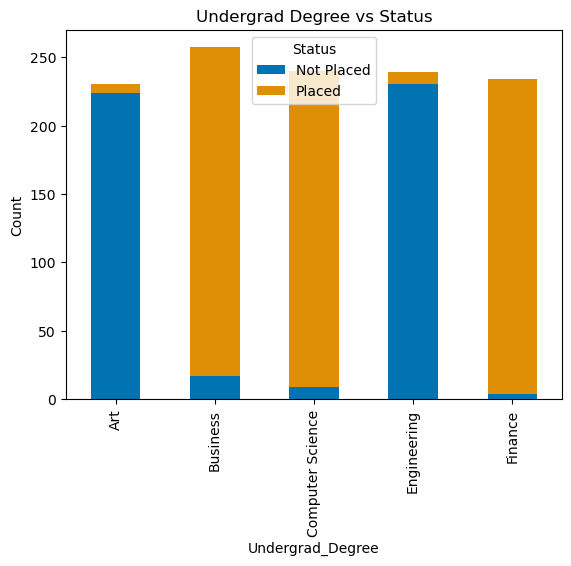

In [12]:
# Create stacked bar plot
undergrad_ct.plot(kind="bar", stacked=True)
plt.title("Undergrad Degree vs Status")
plt.ylabel("Count")
plt.show()

With a high Chi-square test value and an extremely low p-value (<0.0001) results, this shows that the Undergrad Degree is highly correlated with Status. 
Looking at the stacked bar chart, it shows that certain degrees are more highly likely to be placed after graduation. 

# Work Experience vs Status

In [13]:
workexperience_ct = pd.crosstab(df["Work_Experience"], df["Status"])
print(workexperience_ct)

chi2, p, dof, expected = chi2_contingency(workexperience_ct)
print(f"\nChi-Square value: {chi2}")
print(f"P-value: {p}")

Status           Not Placed  Placed
Work_Experience                    
No                      478     588
Yes                       6     128

Chi-Square value: 78.91571614874363
P-value: 6.481706163814314e-19


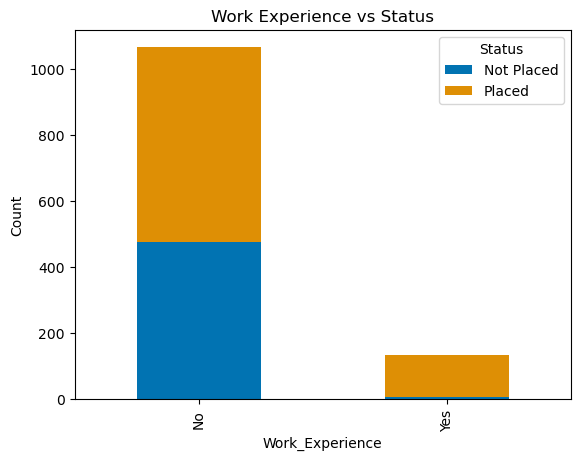

In [17]:
# Create stacked bar plot
workexperience_ct.plot(kind="bar", stacked=True)
plt.title("Work Experience vs Status")
plt.ylabel("Count")
plt.show()

The stacked bar chart shows that students with prior work experience are much more likely to get placed after graduation. Although, students without work experience are more likely to get placed after graduation, having prior work experience makes them more likely to be placed. 
This relationship also shows a high chi-squre value and with an extremely low p-value (<0.0001), work experience is statistically significant in determining placement. 

# Conclusion 
There are four variables that are available for pre-admission to the MBA program:
- Undergrad Grade
- Employability Before
- Work Experience
- Undergrad Degree

After analyzing these pre-admission variables in relation to status, the Undergrad Grade showed it was not statistically significant in determining placement outcomes. Employability Before showed very weak correlation with placement. However, both Work Experience and Undergrad Degree was statistically signficant and highly correlated with placement status. 

Machine learning algorithms will be developed using Work Experience, Undergrad Degree and Employability Before to predict classification of whether a student will be employed within 2 months after graduating from the MBA program. 

# Predictive Modeling Dataset

A final dataset will be created for use with predictive modeling. 

In [19]:
df_final = df.drop(columns=["Undergrad_Grade"])
df_final.head()

,Undergrad_Degree,Work_Experience,Employability_Before,Status,Status_enc
0,Business,No,252.0,Placed,1
1,Business,No,423.0,Not Placed,0
2,Computer Science,Yes,101.0,Placed,1
3,Engineering,No,288.0,Not Placed,0
4,Finance,No,248.0,Not Placed,0


In [20]:
df_final.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Undergrad_Degree      1200 non-null   object 
 1   Work_Experience       1200 non-null   object 
 2   Employability_Before  1200 non-null   float64
 3   Status                1200 non-null   object 
 4   Status_enc            1200 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 241.3 KB


In [22]:
df_final.to_csv(datasets / "school_final_dataset.csv", index=False)